In [1]:
using FastGaussQuadrature
using LinearAlgebra
using DifferentialEquations
using NLsolve
using Printf
using SparseArrays
# using ModelingToolkit
using BenchmarkTools
using Statistics
using CairoMakie
using LinearAlgebra
using LaTeXStrings
using ForwardDiff
using Optim
using Polynomials
using Noise
using Random
using NumericalIntegration

In [2]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

In [3]:
CairoMakie.activate!(type = "svg")

In [4]:
P      = 1.0            #bar
P0     = 1.0            #bar
MC     = 10.0           #grams of catalyst in reactor
NS0    = 10.0           #moles of active sites
FAf    = 1              #mol/s
FBf    = 2              #mol/s
FCf    = 0              #mol/s
FIf    = 1000           #mol/s
FAf_S  = FAf/NS0        #mol/s/mol active site
FBf_S  = FBf/NS0        #mol/s/mol active site
FCf_S  = FCf/NS0        #mol/s/mol active site
FIf_S  = FIf/NS0        #mol/s/mol active site
R      = 8.314 #J/mol/K
kb     = 1.380649e-23 #J/K
h      = 6.62607015e-34 #J*s
phi    = 0.5
VR     = 50000.0  #L
VF     = VR*phi #L
VC     = VR*(1-phi) #L
rhoB   = 1.0
rhoS0  = 1.0
kd     = 1e-6 #1/sec

DSACT = [-100, -100, -100, 0, 0]      #J/mol/K
DHACT = [0, 0, 0, 100, 130]*1000      #J/mol
DS    = [-100, -100, -100, 0, 0]      #J/mol/K
DH    = [-100, -100, -100, 0, -40]*1000 #J/mol
sigma = [1, 1, -1, 1, 0]
DHrxn = sum(sigma.*DH) #J/mol
DSrxn = sum(sigma.*DS) #J/mol/K

#Temperature dependent quantities, define each as a function of T to be given as parameter
K(T)     = exp.(DS/R).*exp.(-DH/R/T)
kf(T)    = kb*T/h*exp.(DSACT/R).*exp.(-DHACT/R/T)
kr(T)    = kf(T)./K(T)
Qf(T)    = (FAf + FBf + FCf + FIf)*0.083145*T/P #L/s
tauF(T)  = VF/Qf(T)
DGrxn(T) = DHrxn .- T*DSrxn
Krxn(T)  = exp.(-DGrxn(T)/R/T)
Kck(T)   = K(T)[1]*K(T)[2]/K(T)[3]*K(T)[4]
TC(T)    = 1 - Krxn(T)/Kck(T);

In [5]:
#System of Ordinary Differential Equationsto be solved

#Best practice is usually to write system of ODEs as in-place updating function
#Convention in Julia is in-place updating indicated with an ! after the function name
#Arguments to function should be f(du, u, p, t) 
#du is the "left hand side" of the ODEs to be evaluated at current u, p, t values
#u is the set of state (dependent) variables provided as an array argument
#p is a set of parameters passed to the system of equations
#t is the independent variable of integration (e.g., "time")

function tCSTR!(du, u, p, t)
    
    #unpack parameters
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0 = p
    
    #Labelling unknowns for readable equations; Fj [=] mol/s/mol site
    FA_S = u[1]
    FB_S = u[2]
    FC_S = u[3]
    tA   = u[4]
    tB   = u[5]
    tC   = u[6]
    
    #Calculate vacancies from site balance
    tV   = 1 - tA - tB - tC
    
    #Total molar flowrate of gas phase species
    FT_S   = FA_S + FB_S + FC_S + FIf_S #mol/s/mol site
    
    #Mole fractions
    yA     = FA_S/FT_S
    yB     = FB_S/FT_S
    yC     = FC_S/FT_S
    
    #Thermodynamic activities
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Elementary reaction rates in TOF units
    r1 = k1f*aA*tV - k1r*tA
    r2 = k2f*aB*tV - k2r*tB
    r3 = k3f*aC*tV - k3r*tC
    r4 = k4f*tA*tB - k4r*tC*tV

    #Production rates, TOF units [=] moles species/mole site/time
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    
    #Material balances, LHS = ODE 
    du[1]     = 1/tauF(T)*(FAf_S - FA_S + RA) #[=] moles species/mole site/time/time
    du[2]     = 1/tauF(T)*(FBf_S - FB_S + RB) #[=] moles species/mole site/time/time
    du[3]     = 1/tauF(T)*(FCf_S - FC_S + RC) #[=] moles species/mole site/time/time
    du[4]     = RAs #[=] moles species/mole site/time
    du[5]     = RBs #[=] moles species/mole site/time
    du[6]     = RCs #[=] moles species/mole site/time
end

tCSTR! (generic function with 1 method)

In [6]:
#Optional, but useful: write setup and solution of ODE system in a function.

#This example uses a couple of Julia-specific tricks:
#I have written a domainfunction; this is used to specify the domain of your state variables in u
#Here, I am encountering a common problem of state variables going negative as the ODE solver integrates
#There is nothing in the ODE system to mathematically prevent state variables from going negative
#However, physically, negative flowrates and coverages are impossible.
#I want to keep all of my state variables positive, so I write a domain function that specifies this:
#domainfunc = (u, p, t) -> any(x -> x < 0, u)
#This uses an anonymous function (lambda function) syntax that evaluates to true if any(u) < 0
#If any value of u becomes negative, the ODE solver rejects the step and takes a smaller one
#It repeats this until the domain constraint is satisified

function tCSTRmain(par)
    
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0 = par
    
    #Set up ODE solver, solve problem
    #Domain function to keep state variables positive; not always necessary, but is in this example.
    domainfunc = (u, p, t) -> any(x -> x < 0, u)
    
    #Initial state
    u0 = [0., 0., 0., 0., 0., 0.] 
    
    #Integration span
    tspan = (0.0, 1e13) #adequate time to reach steady state? t --> :∞ 
    
    #This is a set of times on a log scale; will interpolate ODE solution to these time points for plotting
    tvals    = 10 .^range(-1, stop = 13, length = 200)
    
    #Define the problem using ODEProblem constructor
    prob = ODEProblem(tCSTR!, u0, tspan, par)
    
    #Solve ODE problem using Rosenbrock23; specifify domain funct and saveat keyword arguments
    tCSTRsol = solve(prob, Rosenbrock23(), isoutofdomain = domainfunc, saveat = tvals)
    
    #Benchmarking results
    #display(@benchmark solve($prob, Rosenbrock23(), isoutofdomain = $domainfunc, saveat = $tvals))
    
    #time set for plotting on log x axis
    #Julia ODE solution structures have built in interpolation
    #Pass a new time set into the solution, and it will return the values of state variables at those times
    #Precision only guaranteed if times specified are within limits of integration span
    tCSTRout = tCSTRsol(tvals)
    
    #Output information, function of time.
    FA_S = tCSTRout[1,:]
    FB_S = tCSTRout[2,:]
    FC_S = tCSTRout[3,:]
    tA   = tCSTRout[4,:]
    tB   = tCSTRout[5,:]
    tC   = tCSTRout[6,:]
    tV   = 1 .- tA .- tB .- tC
    XA   = (FAf_S .- FA_S)/FAf_S
    
    #Specify returns
    return tvals, FA_S, FB_S, FC_S, XA, tA, tB, tC, tV
end

tCSTRmain (generic function with 1 method)

In [7]:
#Specify conditions for the problem
T      = 298
par0   = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0]

#Solve the problem, store the returns.
tCSTR_tvals, tCSTR_FA_S, tCSTR_FB_S, tCSTR_FC_S, tCSTR_XA, tCSTR_tA, tCSTR_tB, tCSTR_tC, tCSTR_tV = tCSTRmain(par0);

#Plot results of transient CSTR simulation as function of time.
# plt1 = plot(tCSTR_tvals[tCSTR_FA_S .> 0], tCSTR_FA_S[tCSTR_FA_S .> 0], xscale = :log10, yscale = :log10, label = "FA", legend = :bottomright)
# plt1 = plot!(plt1, tCSTR_tvals[tCSTR_FB_S .> 0], tCSTR_FB_S[tCSTR_FB_S .> 0], label = "FB")
# plt1 = plot!(plt1, tCSTR_tvals[tCSTR_FC_S .> 0], tCSTR_FC_S[tCSTR_FC_S .> 0], label = "FC")

# plt2 = plot(tCSTR_tvals[tCSTR_tA .> 0], tCSTR_tA[tCSTR_tA .> 0], xscale = :log10, yscale = :log10, label = "thetaA", legend = :bottomright)
# plt2 = plot!(plt2, tCSTR_tvals[tCSTR_tB .> 0], tCSTR_tB[tCSTR_tB .> 0], label = "thetaB")
# plt2 = plot!(plt2, tCSTR_tvals[tCSTR_tC .> 0], tCSTR_tC[tCSTR_tC .> 0], label = "thetaC")
# plt2 = plot!(plt2, tCSTR_tvals[tCSTR_tV .> 0], tCSTR_tV[tCSTR_tV .> 0], label = "thetaV")

# @printf("Steady state flowrates of A, B, and P are %3.2E, %3.2E, %3.2E mol/s/mol active site \n", tCSTR_FA_S[end], tCSTR_FB_S[end], tCSTR_FC_S[end])
# @printf("Fractional Conversion of A is %3.2E \n", tCSTR_XA[end])
# @printf("Steady State Coverages of A, B, C, and V are %3.2E, %3.2E, %3.2E, %3.2E \n", tCSTR_tA[end], tCSTR_tB[end], tCSTR_tC[end], tCSTR_tV[end])
# @printf("The turnover frequency for this reaction is approximately %3.2E mol/s/mol site.", tCSTR_FC_S[end])
# display(plt1)
# display(plt2)

**Packed Bed Reactors**

**Dynamic Balances on Tubular Reactors (non-differential operation)**

Our interest in this topic stems from frequently attempting to study the kinetics of reactions wherein their is substantial deactivation of the catalyst.  In some systems, we have found that it is not possible to operate under strict differential conditions for the duration of the experiment. The case of a packed bed is unique relative to the CSTR because deactivation implies that, potentially, the number of actives sites is changing as a function of time, but in a packed bed, the number of active sites is perhaps the most relevant characteristic "size" of the system (as opposed to volume or catalyst mass).  One usually develops material balances on packed beds by consideration of a spatial element of fixed size, e.g., a control volume. Allowing that control volume to approach zero is what generates a spatial derivative in the packed bed.  So it is not entirely clear how to treat the spatial dimension in the case of catalyst deactivation. We find the following to be rigorous and relatively straightforward. 

**Bulk Species**

We begin as for a plug flow reactor by writing a balance on a control volume of size $\Delta V_R$. We specifically take this quantity to represent the internal volume of the reactor, which we assume as equivalent to the volume of the bed (catalyst + void space).

$$\frac{dN_j}{dt} = F_j \, \big|_{V_R} - F_j \, \big|_{V_R + \Delta V_R} + {R_j}\Delta V_R$$

We express the total number of moles of species *j* in the reactor as the product of it's bulk concentration and the free space (the volume of the bulk fluid) in the reactor:

$$\frac{dC_j\Delta V_F}{dt} = F_j \, \big|_{V_R} - F_j \, \big|_{V_R + \Delta V_R} + {R_j} \Delta V_R$$

And we recognize that the free volume can be expressed as the product of the reactor (bed) volume and the void fraction, $\phi$:

$$\frac{dC_j \phi \Delta V_R}{dt} = F_j \, \big|_{V_R} - F_j \, \big|_{V_R + \Delta V_R} + {R_j} \Delta V_R$$

Now recognizing the $\Delta V_R$ and $\phi$ are time independent and dividing the equation by the size of the control volume, $\Delta V_R$:

$$\phi\frac{dC_j}{dt} = \frac{F_j \, \big|_{V_R} - F_j \, \big|_{V_R + \Delta V_R}}{\Delta V_R} + {R_j}$$

Finally, taking the limit as $\Delta V_R \rightarrow 0$, we arrive at a relatively familiar form of the dynamic balance on a PFR or Packed Bed:

$$\phi \frac{\partial C_j}{\partial t} = -\frac{\partial F_j}{\partial V_R} + {R_j}$$

Experimentally, the mass of catalyst in the bed is usually a more convenient "spatial" description of the bed than the volume of the reactor. We facilitate the conversion by recognizing that:

$$V_R = \frac{W}{\rho_B}$$

Then:

$$\phi\frac{\partial C_j}{\partial t} = -\frac{\partial F_j}{\partial \frac{W}{\rho_B}} + {R_j}$$

One assumes that the bulk density of the catalyst bed (material + void) is constant across the bed, so this simplifies to:

$$\phi \frac{\partial C_j}{\partial t} = -\rho_B \frac{\partial F_j}{\partial W} + {R_j}$$

As usual, we prefer to work in turnover frequency units and so express the volume-normalized intensive production rate $R_j$ accordingly:

$$R_j = {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

Where $\rho_B$ is the bed density, which is assumed constant, and $\rho_S$ is the active site density. In a packed bed, one expects that the active site density may be may be both time *and* position dependent, i.e., $\rho_S = f(t, W)$.

$$\phi\frac{\partial C_j}{\partial t} = -\rho_B \frac{\partial F_j}{\partial W} + {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

Factoring and rearranging:

$$\frac{\partial C_j}{\partial t} = -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

This expression is relatively rigorous and general in that we've made no dubious assumptions (yet).  To facilitate solution, it is convenient that the PDE be expressed in terms of a single state variable in time and spatial domains. We do so by expressing concentrations in terms of molar flowrates:

$$\frac{\partial \frac{F_j}{Q}}{\partial t} = -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

One assumes that in a typical kinetics experiment, where reactants are present in dilute quantities and conversions are typically low, one can assume that the volumetric flowrate is relatively constant with respect to both time and position in the catalyst bed. As such, we set it equal to its feed value, $Q_f$, which is time independent and so facilitates development of the following equation:

$$\frac{\partial F_j}{\partial t} = -\frac{Q_f\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

Recognizing that the density of the bed can be expressed in terms of catalyst mass and bed volume, one finds:

$$\frac{\partial F_j}{\partial t} = -\frac{Q_fM_C}{\phi V_R} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

We again see a grouping of terms that comprise a hydrodynamic space velocity, which is based on the inlet volumetric flowrate and the void volume:

$$\frac{\partial F_j}{dt} = -\frac{M_C}{\tau_F} \left(\frac{\partial F_j}{\partial W} + {R_j}^{\prime\prime\prime}\rho_S\right)$$

This is only a slightly less general form of the dynamic material balance in that it invokes the assumption of a constant volumetric flowrate. This balance describes the dynamic and spatial variation (as a function of catalyst mass) of extensive molar flowrates in the packed bed.  One would integrate in the time domain from 0 to the maximum time on stream, and in the "mass" domain from 0 to the total mass of catalyst in the reactor.  

**Surface Species**

We begin with the same general balance on a control volume, but recognize that surface species do not exist in the bulk; as such, there are no flow terms in the material balance.

$$\frac{dN_{j,*}}{dt} = {R_{j,*}}\Delta V_R$$

We can express the number of surface species as the product of their concentration and size of the control volume, $\Delta V_R$:

$$\frac{dC_{j,*}\Delta V_R}{dt} = {R_{j,*}}\Delta V_R$$

The $\Delta V_R$ is time invariant, which gives:

$$\frac{dC_{j,*}}{dt} = {R_{j,*}}$$

We again choose to work with turnover frequency units and express the volume-normalized production rate of $j_*$ accordingly.

$$\frac{dC_{j,*}}{dt} = {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

This is perhaps the most general form of the balance on surface species; note that its form is parallel to this one for bulk species:

$$\frac{\partial C_j}{\partial t} = -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

We will use these two equations as the starting point for the analysis of non-differential packed bed reactors operating with and without dynamic phenomena. 

**Packed Bed Reactors at Steady State (and without deactivation)**

One can begin with the general forms developed above:

\begin{align}
    \frac{\partial C_j}{\partial t} &= -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right) \\
    \frac{dC_{j,*}}{dt} &= {R_j}^{\prime\prime\prime}\rho_B \rho_S \\
\end{align}

At steady state, these balances simplify considerably:

\begin{align}
    \frac{dF_j}{dW} &= {R_j}^{\prime\prime\prime}\rho_S \\
    0 &= {R_j}^{\prime\prime\prime} 
\end{align}

For this case, we consider an integral reactor without catalyst deactivation; thus, the active site density, $\rho_S$, is constant with respect to position in the reactor. The number of active sites in a system can be represented as the product of catalyst mass ($W$) and active site density ($\rho_S$):

$$S = W\rho_S$$

Focusing on the balance for bulk species:

$$\frac{dF_j}{d \frac{S}{\rho_S} } = {R_j}^{\prime\prime\prime}\rho_S$$

Absent deactivation, we assume $\rho_S$ is constant throughout the bed, so this equation simplifies to:

$$\frac{dF_j}{dS} = {R_j}^{\prime\prime\prime}$$

Which converts results in a form that is integrated from 0 to the total mass of the catalyst bed, $M_C$, to the number of sites, in the catalyst bed $N_S$. As discussed in the CSTR examples, it is convenient to express flowrates in site-time-yield units by normalizing them to the quantity of active sites. To do this, we express the cumulative number of active sites at a given position in the bed, $S$ as a product of the fraction of active sites ($\Theta^{\prime\prime\prime}$) and the total number of active sites ($N_S$):

$$S = \Theta^{\prime\prime\prime} N_S$$

This allows one to convert the TOF units balance to the following form:

$$\frac{dF_j}{d\left(\Theta^{\prime\prime\prime} N_S\right)} = R_j^{\prime\prime\prime}$$

Assuming the total number of active sites is constant, one can re-write this as:

$$\frac{d{F_j}^{\prime\prime\prime}}{d\Theta^{\prime\prime\prime}} = R_j^{\prime\prime\prime}$$

Where the flowrate is expressed in site time yield units (inverse time), and the balance is always integrated from 0 to 1.

With these simplifications, for a non-differential PBR without deactivation, the following balances are convenient:

\begin{align}
    \frac{d{F_j}^{\prime\prime\prime}}{d\Theta^{\prime\prime\prime}} &= R_j^{\prime\prime\prime} \\
    0 &= R_{j,*}^{\prime\prime\prime}
\end{align}

**Application to the Mechanism of Interest**

Considering our base mechanism:

\begin{align}
    A + * &\rightleftharpoons A_* \\
    B + * &\rightleftharpoons B_* \\
    C + * &\rightleftharpoons C_* \\
    A_* + B_* &\rightleftharpoons C_* + * \\
\end{align}

If this reaction occurs in a packed bed, we write a bulk species balance on A, B, and C, and we write surface balances on $A_*$, $B_*$, $C_*$. 

\begin{align}
    \frac{d{F_A}^{\prime \prime \prime}}{d\Theta} &= {R_A}^{\prime \prime \prime} \\
    \frac{d{F_B}^{\prime \prime \prime}}{d\Theta} &= {R_B}^{\prime \prime \prime} \\
    \frac{d{F_C}^{\prime \prime \prime}}{d\Theta} &= {R_C}^{\prime \prime \prime} \\
    0 &= {R_{A_*}}^{\prime \prime \prime} \\
    0 &= {R_{B_*}}^{\prime \prime \prime} \\
    0 &= {R_{C_*}}^{\prime \prime \prime} \\
\end{align}

We solve for the vacancies using a site balance as usual.

$$\theta_V = 1 - \theta_A - \theta_B - \theta_C$$

And we note that, in this case, solution of the DAE system is unavoidable unless there is a tractable analytical solution for the 3 steady state balances on surface species.  In general, this will not be true, and it is necessary to numerically solve the DAE system written in terms of 6 state variables (which we do below). 

We express net production rates in terms of elementary reaction rates:

\begin{align}
    {R_A}^{\prime \prime \prime} &= -{r_1}^{\prime \prime \prime} \\
    {R_B}^{\prime \prime \prime} &= -{r_2}^{\prime \prime \prime} \\
    {R_C}^{\prime \prime \prime} &= -{r_3}^{\prime \prime \prime} \\
    {R_{A_*}}^{\prime \prime \prime} &= {r_1}^{\prime \prime \prime} - {r_4}^{\prime \prime \prime} \\
    {R_{B_*}}^{\prime \prime \prime} &= {r_2}^{\prime \prime \prime} - {r_4}^{\prime \prime \prime} \\
    {R_{C_*}}^{\prime \prime \prime} &= {r_3}^{\prime \prime \prime} + {r_4}^{\prime \prime \prime} \\
\end{align}

And we write elementary rate expressions in terms of activities and coverages:

\begin{align}
    {r_1}^{\prime \prime \prime} &= k_1a_A\theta_* - k_{-1}\theta_A \\
    {r_2}^{\prime \prime \prime} &= k_2a_B\theta_* - k_{-2}\theta_B \\
    {r_3}^{\prime \prime \prime} &= k_3a_C\theta_* - k_{-3}\theta_C \\
    {r_4}^{\prime \prime \prime} &= k_4\theta_A\theta_B - k_{-4}\theta_C\theta_* \\
\end{align}

The solution to this system is presented below. 

In [8]:
function sPFR!(du, u, p, t)
   
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, nsteps = p
    
    FA_S = u[1]
    FB_S = u[2]
    FC_S = u[3]
    tA   = u[4]
    tB   = u[5]
    tC   = u[6]
    tV   = 1 - tA - tB - tC
        
    FT_S   = FA_S + FB_S + FC_S + FIf_S #mol/s
    
    yA     = FA_S/FT_S
    yB     = FB_S/FT_S
    yC     = FC_S/FT_S
    
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Reaction rates in TOF units
    r1 = k1f*aA*tV - k1r*tA
    r2 = k2f*aB*tV - k2r*tB
    r3 = k3f*aC*tV - k3r*tC
    r4 = k4f*tA*tB - k4r*tC*tV

    #Production rates in TOF units
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    
    du[1]     = RA
    du[2]     = RB
    du[3]     = RC
    du[4]     = RAs
    du[5]     = RBs
    du[6]     = RCs
end

function sPFRmain(par)
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, nsteps = par

    #Initial state:
    u0 = [FAf_S, FBf_S, FCf_S, SStA, SStB, SStC]
    tspan = (0.0, 1.0)

    #Construct mass matrix as shown in markdown cells above
    elements = [1, 1, 1, 0, 0, 0]
    M    = Diagonal(elements)
    f    = ODEFunction(sPFR!, mass_matrix = M) #Must use ODEFunction constructor to add the mass matrix option
    prob = ODEProblem(f, u0, tspan, par) #Run ODEProblem constructor on function f created by ODEFunction
    sPFRsol = solve(prob, Rodas4P())
    #display(@benchmark solve($prob, Rodas4P()))
    tvals = collect(range(0.0, stop = 1.0, length = Int(nsteps)))
    #tvals = 10 .^range(-8, stop = 0, length = 200)
    sPFRsolf  = sPFRsol(tvals)
    FA_S = sPFRsolf[1,:]
    FB_S = sPFRsolf[2,:]
    FC_S = sPFRsolf[3,:]
    FT_S = FA_S .+ FB_S .+ FC_S
    XA   = (FAf_S .- FA_S)/FAf_S
    tA   = sPFRsolf[4,:]
    tB   = sPFRsolf[5,:]
    tC   = sPFRsolf[6,:]
    tV   = 1 .- tA .- tB .- tC
    Q = FC_S.*FT_S./FA_S./FB_S
    z = Q/Krxn(T)
    return tvals, FA_S, FB_S, FC_S, XA, tA, tB, tC, tV, z
end

sPFRmain (generic function with 1 method)

In [9]:
T      = 298
SStA   = 0.24
SStB   = 0.62
SStC   = 0.14
nsteps = 100
par0   = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, nsteps]
sPFR_tvals, sPFR_FA_S, sPFR_FB_S, sPFR_FC_S, sPFR_XA, sPFR_tA, sPFR_tB, sPFR_tC, sPFR_tV, sPFR_z = sPFRmain(par0);

# plt1 = plot(sPFR_tvals[sPFR_FA_S .> 0], sPFR_FA_S[sPFR_FA_S .> 0], xscale = :identity, yscale = :log10, label = "FA", legend = :bottomright)
# plt1 = plot!(plt1, sPFR_tvals[sPFR_FB_S .> 0], sPFR_FB_S[sPFR_FB_S .> 0], label = "FB")
# plt1 = plot!(plt1, sPFR_tvals[sPFR_FC_S .> 0], sPFR_FC_S[sPFR_FC_S .> 0], label = "FC")

# plt2 = plot(sPFR_tvals[sPFR_tA .> 0], sPFR_tA[sPFR_tA .> 0], xscale = :identity, yscale = :log10, label = "thetaA", legend = :bottomright)
# plt2 = plot!(plt2, sPFR_tvals[sPFR_tB .> 0], sPFR_tB[sPFR_tB .> 0], label = "thetaB")
# plt2 = plot!(plt2, sPFR_tvals[sPFR_tC .> 0], sPFR_tC[sPFR_tC .> 0], label = "thetaC")
# plt2 = plot!(plt2, sPFR_tvals[sPFR_tV .> 0], sPFR_tV[sPFR_tV .> 0], label = "thetaV")

# plt3 = plot(sPFR_tvals[sPFR_XA .> 0], sPFR_XA[sPFR_XA .> 0], xscale = :identity, yscale = :log10, label = "XA", legend = :bottomright)

# plt4 = plot(sPFR_tvals[sPFR_z .> 0], sPFR_z[sPFR_z .> 0], xscale = :identity, yscale = :log10, label = "Z", legend = :bottomright)

# @printf("Steady state flowrates of A, B, and C are %3.2E, %3.2E, %3.2E mol/s/mol active site \n", sPFR_FA_S[end], sPFR_FB_S[end], sPFR_FC_S[end])
# @printf("Fractional Conversion of A is %3.2E \n", sPFR_XA[end])
# @printf("Steady State Coverages of A, B, C, I, and V are %3.2E, %3.2E, %3.2E, %3.2E", sPFR_tA[end], sPFR_tB[end], sPFR_tC[end], sPFR_tV[end])

# display(plt1)
# display(plt2)
# display(plt3)
# display(plt4)

Alternatively, if one is able to identify a rate controlling step and develop a closed form solution for the overall reaction rate, then it is only necessary to write balances on bulk species, avoiding the problem of solving algebraic equations to determine surface coverages.  For example, here, the parameter set selected ensures that the surface reaction (Step 4) is always rate controlling; as such, one can develop the following expression for the overall reaction rate by assuming that steps 1 - 3 are quasi equilibrated:

$${r}^{\prime \prime \prime} = \frac{k_4 K_1 K_2 a_A a_B - k_{-4}K_3a _C}{\left(1 + K_1a_A + K_2a_B + K_3a_C\right)^2}$$

With that, the system is simplified considerably:

We only write balances on A, B, and C, which gives an ODE system expressed in terms of 3 state variables ($F_A$, $F_B$, and $F_C$). 

\begin{align}
    \frac{d{F_A}^{\prime \prime \prime}}{d\Theta} &= {R_A}^{\prime \prime \prime} \\
    \frac{d{F_B}^{\prime \prime \prime}}{d\Theta} &= {R_B}^{\prime \prime \prime} \\
    \frac{d{F_C}^{\prime \prime \prime}}{d\Theta} &= {R_C}^{\prime \prime \prime} \\
\end{align}

We express net production rates for bulk species in terms of the overall reaction rate:

\begin{align}
    {R_A}^{\prime \prime \prime} &= -{r}^{\prime \prime \prime} \\
    {R_B}^{\prime \prime \prime} &= -{r}^{\prime \prime \prime} \\
    {R_C}^{\prime \prime \prime} &= {r}^{\prime \prime \prime} \\
\end{align}

The solution to this system is presented below. 

**Dynamic Phenomena in a non-differential Packed Bed (without deactivation)**

One can begin with the general forms developed above:

\begin{align}
    \frac{\partial C_j}{\partial t} &= -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right) \\
    \frac{dC_{j,*}}{dt} &= {R_j}^{\prime\prime\prime}\rho_B \rho_S \\
\end{align}

If there is no deactivation, one can assume the density of active sites is constant and arrive at similar forms of the balance equation to those derived for various CSTR and steady state packed bed models.  Specifically, we will express the densities appearing the above balances:

\begin{align}
    \rho_b = \frac{M_C}{V_R} \\
    \rho_s = \frac{N_S}{M_C}
\end{align}

Starting with the bulk species balance:

$$\frac{\partial C_j}{\partial t} = -\frac{\rho_B}{\phi} \left(\frac{\partial F_j}{\partial W} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

We convert the differential element on catalyst mass, W, into one on number of active sites, S.

$$\frac{\partial C_j}{\partial t} = -\frac{M_C}{V_R\phi} \left(\frac{\partial F_j}{\partial \frac{S}{\rho_S}} - {R_j}^{\prime\prime\prime}\rho_S\right)$$

Then

$$\frac{\partial C_j}{\partial t} = -\frac{M_CN_S}{M_CV_R\phi} \left(\frac{\partial F_j}{\partial S} - {R_j}^{\prime\prime\prime}\right)$$

Simplifying and rearrangning:

$$\frac{1}{N_S}\frac{\partial C_j}{\partial t} = -\frac{1}{V_R\phi} \left(\frac{\partial F_j}{\partial S} - {R_j}^{\prime\prime\prime}\right)$$

Expressing concentration for the bulk species in terms of flowrates:

$$\frac{1}{N_S}\frac{\partial \frac{F_j}{Q}}{\partial t} = -\frac{1}{V_R\phi} \left(\frac{\partial F_j}{\partial S} - {R_j}^{\prime\prime\prime}\right)$$

Assuming that this, in this experiment, the density of the bulk fluid is constant so that the volumetric flowrate is fixed at the feed value, $Q_f$, and that the number of active sites in the reactor, $N_S$, is time-invariant.

$$\frac{1}{Q_f}\frac{\partial \frac{F_j}{N_S}}{\partial t} = -\frac{1}{V_R\phi} \left(\frac{\partial F_j}{\partial S} - {R_j}^{\prime\prime\prime}\right)$$

And expressing:

\begin{align}
    F_j = {F_j}^{\prime\prime\prime} N_S \\
    S   = \Theta N_S
\end{align}

$$\frac{1}{Q_f}\frac{\partial \frac{F_j}{N_S}}{\partial t} = -\frac{1}{V_R\phi} \left(\frac{\partial {F_j}^{\prime\prime\prime} N_S}{\partial \Theta N_S} - {R_j}^{\prime\prime\prime}\right)$$

Which ultimately simplifies to an intensive balance on flowrates normalized by the number of active sites, i.e., site-time yield or turnover frequency units and the limits on spatial integration go from 0 to 1:

$$\frac{\partial {F_j}^{\prime\prime\prime}}{\partial t} = -\frac{1}{\tau_F} \left(\frac{\partial {F_j}^{\prime\prime\prime}}{\partial \Theta} - {R_j}^{\prime\prime\prime}\right)$$

Analogously, the balance on surface species:

$$\frac{\partial C_{j,*}}{\partial t} = {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

Can be expressed as follows:

$$\frac{\partial \frac{N_{j,*}}{V_R}}{dt} = {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

Since the size of the reactor is time invariant:

$$\frac{\partial N_{j,*}}{dt} = {R_j}^{\prime\prime\prime}\rho_B \rho_S V_R$$

We recognize the product of densities and volume as the total number of active sites in the catalyst bed, $N_S$:

$$\frac{\partial N_{j,*}}{dt} = {R_j}^{\prime\prime\prime} N_S$$

And since we have assumed a constant number of active sites, this can be redefined with surface coverage as the state variable:

$$\frac{\partial \theta_{j,*}}{dt} = {R_j}^{\prime\prime\prime}$$

So, for a dynamic packed bed reactor in the absence of catalyst deactivation, we have the following balances:

\begin{align}
    \frac{\partial {F_j}^{\prime\prime\prime}}{\partial t} &= -\frac{1}{\tau_F} \left(\frac{\partial {F_j}^{\prime\prime\prime}}{\partial \Theta} - {R_j}^{\prime\prime\prime}\right) \\
    \frac{\partial \theta_{j,*}}{dt} &= {R_j}^{\prime\prime\prime}
\end{align}

Unfortunately, the governing balances in this scenario--a dynamic, non-integral PBR--are partial differential equations.  Although there are many good methods for solving such systems, it is generall cumbersome, especially when using reactor models as the core of an objective function in a parameter estimation routine.  Here, we provide a solution for this problem to illustrate the methodology, and to provide a rigorous benchmark for comparison of subsequent tractable (but approximate) solutions to dynamic phenomena in a non-differential packed bed.

The basic approach that we will use is the method of lines, which requires that we discretize one dimension to convert one of the partial differential equations into a set of algebraic equations. We will then use a numerical ODE solver to integrate the remaining differential equation (now and ODE).  Here, we will discretize the spatial domain (the number of active sites) as it is clear that, in the problem formulated above, the spatial domain goes from 0 to 1.  We will use a backward difference formula to discretize the spatial domain, and then we will integrate the time domain with an ODE solver. Note that there other options for how to solve the PDE, and there are even other options for discretization.  A backward difference formula works reasonably well for a PBR, which has a known boundary condition at the reactor entrance ($\Theta = 0$) and a discontinuity in the residence time distribution (the RTD is a Heaviside step at t = $\tau_F$).  In some cases, a collocation method may be more computationally efficient, but it introduces oscillatory behavior in a packed bed simulation.  We will cover an example of method of lines with collocation for a PBR with axial dispersion later in the tutorial.

We will not present a complete discussion of finite differences, collocation, or method-of-lines here, but the general approach is that we will discretize the reactor spatially into a number of nodes.  We will solve for the time dependent bulk flowrates and surface coverage at each node, which will give us an approximate solution to both the temporal and spatial profile of flowrates and coverages in the reactor.

As a relatively straightforward example, we consider the approximate solution obtained by assuming a rate determining step.

In [10]:
function fdmbd(lower, upper, points)
    dx    = (upper - lower)/points
    xvals = collect(range(lower, stop = upper, length = points))
    
    idxI  = fill( 1, (points))
    idxz  = fill( 1, (points) )
    idxn1 = fill( -1, (points - 1,) )
    base  = spdiagm(0 => idxz, -1 => idxn1)
    Db    = 1/dx*base
    eye   = diagm(0 => idxI) 
 
    return dx, xvals, base, Db, eye
end


fdmbd (generic function with 1 method)

Notes: The above discretizes the spatial domain of the reactor into 100 steps of equal size.  Solving this problem takes approximately 20 seconds.  The full system includes balances written on 3 species at each of these 100 steps, which gives 300 differential equations.  While a 20 second solution is not time prohibitive for a single simulation, it is considerably longer than the ODE solutions, which generally require only a few miliseconds.  This can begin to present problems when a parameter estimation routine depends on solution of a PDE (method of lines problem) in order to evaluate the objective function at a given parameter set.  We also note that there is about 1% error in this solution along the length of the reactor compared to the numerical solution of the steady state ODE. This arises to do the fact that finite differenes are a rough approximation of the derivative over the spatial step and it will generally require very small steps sizes (~ 1000 steps) to get close to the true steady-state solution.  This is necessarily going to be an accuracy vs. computation time tradeoff.

The above solution took advantage of assuming a rate determining step to avoid solution of differential equations associated with surface coverages.  This is not always possible, and it is sometimes necessary to instead solve the full set of differential equations corresponding to both bulk and surface species.  This is covered below by writing the following material balances as relevant for all bulk and surface species:

\begin{align}
    \frac{\partial {F_j}^{\prime\prime\prime}}{\partial t} &= -\frac{1}{\tau_F} \left(\frac{\partial {F_j}^{\prime\prime\prime}}{\partial \Theta} - {R_j}^{\prime\prime\prime}\right) \\
    \frac{\partial \theta_{j,*}}{dt} &= {R_j}^{\prime\prime\prime}
\end{align}

Here our initial condition is that the molar flowrate of each species and the fractional coverage of each species is zero at time = 0.  Our boundary conditions are the same as in a typical packed bed or plug flow reactor: we assume that the flowrates of species immediately downstream of the reactor entrance are identical to those immediately upstream of the reactor entrance, i.e.:

<br> 
<span style="font-size:1.5em;">
$$F_{j,0^-} = F_{j,0^+}$$ 
</span>

In [11]:
function tPFR!(du, u, p, t)

    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, nsteps, Db = p

    FA_S = u[1:nsteps]
    FB_S = u[nsteps+1:2*nsteps]
    FC_S = u[2*nsteps+1:3*nsteps]
    tA   = u[3*nsteps+1:4*nsteps]
    tB   = u[4*nsteps+1:5*nsteps]
    tC   = u[5*nsteps+1:6*nsteps]
    
    FT_S = FA_S .+ FB_S .+ FC_S .+ FIf_S #mol/s
    tV = 1 .- tA .- tB .- tC
    
    yA     = FA_S./FT_S
    yB     = FB_S./FT_S
    yC     = FC_S./FT_S

    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Reaction rates in TOF units
    r1 = k1f*aA.*tV - k1r*tA
    r2 = k2f*aB.*tV - k2r*tB
    r3 = k3f*aC.*tV - k3r*tC
    r4 = k4f*tA.*tB - k4r*tC.*tV
    
    #Production rates in TOF units
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    
    #Material balances on species
    du[1:nsteps]              = -1/tauF(T)*(Db*FA_S - RA)
    du[nsteps+1:2*nsteps]     = -1/tauF(T)*(Db*FB_S - RB)
    du[2*nsteps+1:3*nsteps]   = -1/tauF(T)*(Db*FC_S - RC)
    du[3*nsteps+1:4*nsteps]   =  RAs
    du[4*nsteps+1:5*nsteps]   =  RBs
    du[5*nsteps+1:6*nsteps]   =  RCs
    
    #Boundary condition for a PBR at reactor entrance: F_A0- = F_A0+
    du[1]          = FAf_S - FA_S[1]
    du[nsteps+1]   = FBf_S - FB_S[1]
    du[2*nsteps+1] = FCf_S - FC_S[1]
end

function tPFRmain(par)
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, nsteps, Db = par
    
    Mveca     = ones(nsteps,)
    Mveca[1]  = 0
    Mvecd     = ones(nsteps,)
    Mvec      = vcat(Mveca, Mveca, Mveca, Mvecd, Mvecd, Mvecd)
    M         = diagm(Mvec)
    FA0       = zeros(nsteps,)
    FB0       = zeros(nsteps,)
    FC0       = zeros(nsteps,)
    tA0       = zeros(nsteps,)
    tB0       = zeros(nsteps,)
    tC0       = zeros(nsteps,)
    u0        = vcat(FA0, FB0, FC0, tA0, tB0, tC0)
    span      = (0.0, 1000000)
    domainfunc = (u,p,t) -> any(x -> x < 0, u)
    odefun    = ODEFunction(tPFR!, mass_matrix = M) 
    prob      = ODEProblem(odefun, u0, span, par)
    @time soltPFR     = solve(prob, Rodas5(), save_everystep = false)
    Vfd  = collect(range(0.0, stop = 1.0, length = nsteps))
    FA_S = soltPFR.u[end][1:nsteps]
    FB_S = soltPFR.u[end][nsteps+1:2*nsteps]
    FC_S = soltPFR.u[end][2*nsteps+1:3*nsteps]
    tA   = soltPFR.u[end][3*nsteps+1:4*nsteps]
    tB   = soltPFR.u[end][4*nsteps+1:5*nsteps]
    tC   = soltPFR.u[end][5*nsteps+1:6*nsteps]
    XA   = (FAf_S .- FA_S)/FAf_S
    return soltPFR, Vfd, FA_S, FB_S, FC_S, tA, tB, tC
end

tPFRmain (generic function with 1 method)

In [12]:
#limits on spatial domain
lower = 0
upper = 1

#Finite difference parameters
nsteps   = 25
dx, xvals, base, Db, eye = fdmbd(lower, upper, nsteps)

T        = 298
tPFRpar0 = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, nsteps, Db]
soltPFR, tPFR_Vfd, tPFR_FA_S, tPFR_FB_S, tPFR_FC_S, tPFR_tA, tPFR_tB, tPFR_tC = tPFRmain(tPFRpar0);

tCSTRpar0 =  [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0]
tCSTR_tvals, tCSTR_FA_S, tCSTR_FB_S, tCSTR_FC_S, tCSTR_XA, tCSTR_tA, tCSTR_tB, tCSTR_tC, tCSTR_tV = tCSTRmain(par0);

SStA = tCSTR_tA[end]
SStB = tCSTR_tB[end]
SStC = tCSTR_tC[end]

par0   = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, nsteps]
sPFR_tvals, sPFR_FA_S, sPFR_FB_S, sPFR_FC_S, sPFR_XA, sPFR_tA, sPFR_tB, sPFR_tC, sPFR_tV, sPFR_z = sPFRmain(par0);

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase C:\Users\jqbon\.julia\packages\SciMLBase\elLNZ\src\performance_warnings.jl:33


  7.060795 seconds (12.84 M allocations: 1.296 GiB, 6.07% gc time, 86.16% compilation time)


In [13]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 3)
CairoMakie.xlims!(ax1, 0, 1)
CairoMakie.ylims!(ax2, 0, 3)
CairoMakie.xlims!(ax2, 0, 1)

ax1.xlabel = L"\Theta"
ax1.ylabel = "STY (1/s)"

ax1.xticks = 0:0.2:1
ax2.xticks = 0:0.2:1
ax1.yticks = 0:0.5:3
ax2.yticks = 0:0.5:3

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tPFR_Vfd, tPFR_FC_S*1e6, label = "Transient", color = :green, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(sPFR_tvals, sPFR_FC_S*1e6, label = "Steady State", color = :blue, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_FC .> 0]/1e6, tCSTRd1_FC[tCSTRd1_FC .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTR_tvals[tCSTR_FC_S .> 0]/1e6, tCSTR_FC_S[tCSTR_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.scatter!(tCSTR_tvals/1e6, tCSTR_FC_S*1e6, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)

fig1
save("PBR1.svg", fig1)

CairoMakie.Screen{SVG}


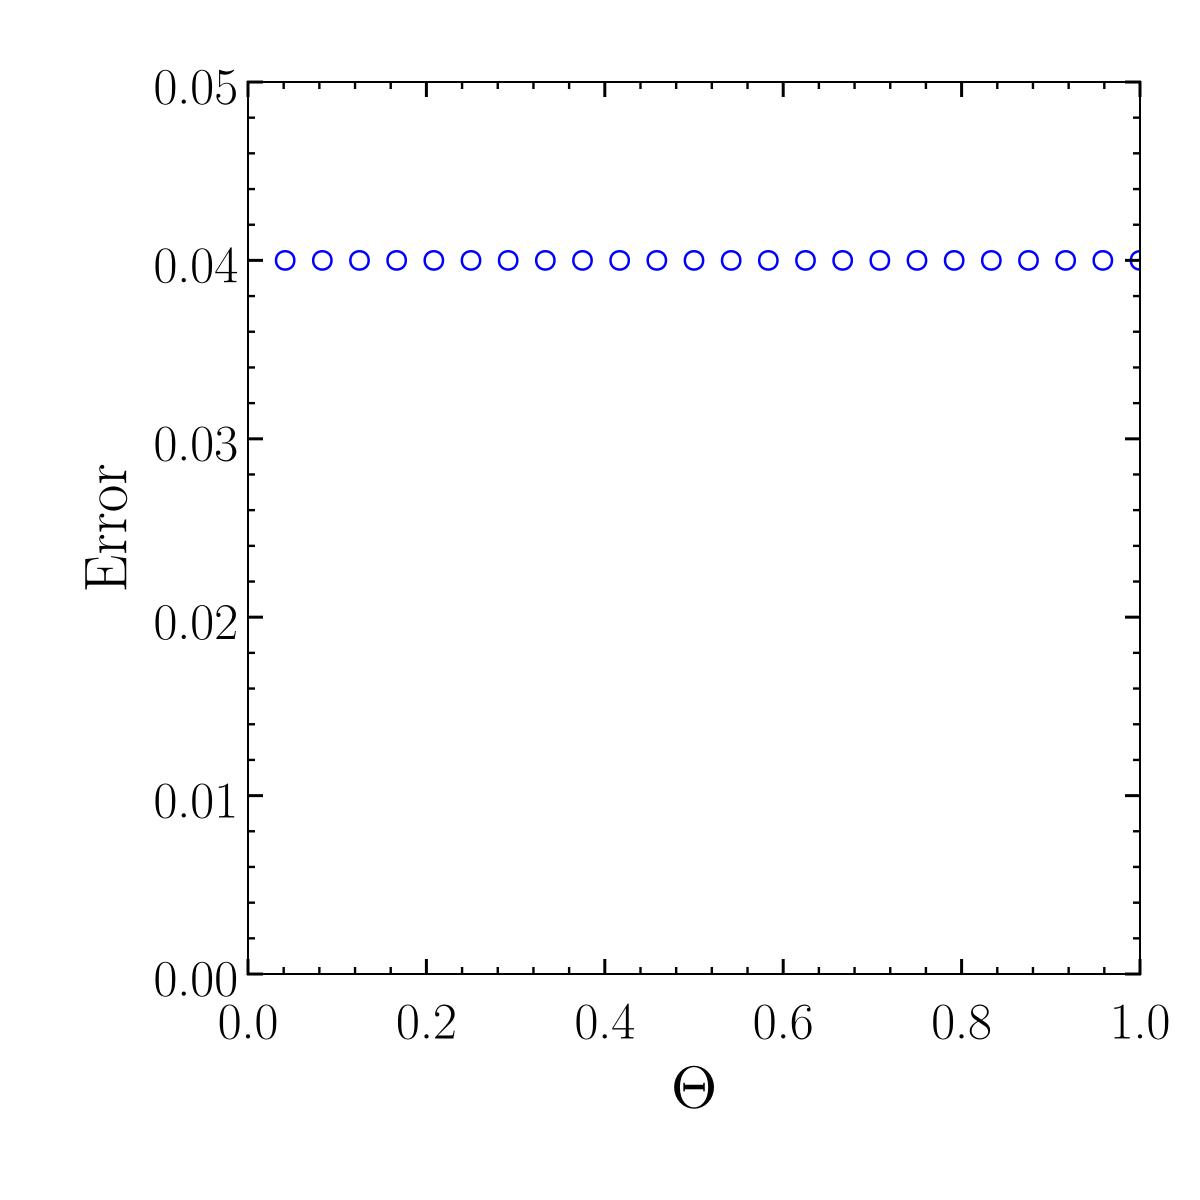

In [14]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 0.05)
CairoMakie.xlims!(ax1, 0, 1)
CairoMakie.ylims!(ax2, 0, 0.05)
CairoMakie.xlims!(ax2, 0, 1)

ax1.xticks = 0:0.2:1
ax1.yticks = 0:0.01:0.05
ax2.xticks  = 0:0.2:1
ax2.yticks = 0:0.01:0.05

ax1.xlabel = L"\Theta"
ax1.ylabel = "Error"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.scatter!(tPFR_Vfd, (sPFR_FC_S - tPFR_FC_S)./sPFR_FC_S, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(sPFR_tvals, sPFR_FC_S*1e6, label = "Steady State", color = :blue, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_FC .> 0]/1e6, tCSTRd1_FC[tCSTRd1_FC .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTR_tvals[tCSTR_FC_S .> 0]/1e6, tCSTR_FC_S[tCSTR_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.scatter!(tCSTR_tvals/1e6, tCSTR_FC_S*1e6, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
#axislegend(position = :lt, framevisible = true)

fig1

In this example, since we wrote balances on 6 species, we decided to further comprimise on precision and only discretize the problem into 25 nodes, resulting in 150 ODEs.  In total, this problem requires approximately 2 seconds to solve and has about 4% error in the prediction of the steady state rate at the exit of the packed bed.

With a transient packed bed model and solution established, one could adapt methods for considering catalyst deactivation presented for a transient CSTR, either by allowing the number or density of active sites to vary with time/composition, or by including an elementary step that encodes the kinetics and thermodynamics of inhibitor accumulation on the catalyst surface.  

For example, as shown above, one can develop the following balance on bulk species in a packed bed (assuming constant fluid density):

$$\frac{\partial F_j}{dt} = -\frac{M_C}{\tau_F} \left(\frac{\partial F_j}{\partial W} + {R_j}^{\prime\prime\prime}\rho_S\right)$$

And we can describe surface species with the following balance:

$$\frac{dC_{j,*}}{dt} = {R_j}^{\prime\prime\prime}\rho_B \rho_S$$

For bulk species, we again have to resolve partial differential equations, and, as we show above, the method of lines is adequate and relatively straightforward for solving transient packed bed models.  It is convenient to establish a spatial domain that varies between 0 and 1; we can do so in the case of a non-constant number of active sites by normalizing flowrates by catalyst mass, and integrating in the spatial domain over the fraction of catalyst mass at a given position in the bed ($\Theta_M$):

$$\frac{\partial {F_j}^\prime}{dt} = -\frac{1}{\tau_F} \left(\frac{\partial {F_j}^\prime}{\partial \Theta_M} + {R_j}^{\prime\prime\prime}\rho_S\right)$$


In parallel, we could model the transient balances on surface species by expressing concentrations as functions of mole number and volume, which gives the following balance:

$$\frac{{dN_{j,*}}^\prime}{dt} = {R_j}^{\prime\prime\prime} \rho_S$$

Where again the superscript prime indicates normalization per unit mass of catalyst instead of per unit active site.  In this model, one would add a time-domain description of the active site density, which can be accomplished using the activity models described above, for example:

$$\rho_S = \rho_{S_0} a$$

where

$$\frac{da}{dt} = -k_da^2\frac{p_A}{p_0}$$

In [15]:
function tPFRd1!(du, u, p, t)
    FAf_M, FBf_M, FCf_M, FIf_M, T, P, P0, nsteps, bdm, kd, rhoS0 = p

    FA_M = u[1:nsteps]
    FB_M = u[nsteps+1:2*nsteps]
    FC_M = u[2*nsteps+1:3*nsteps]
    NA_M = u[3*nsteps+1:4*nsteps]
    NB_M = u[4*nsteps+1:5*nsteps]
    NC_M = u[5*nsteps+1:6*nsteps]
    a    = u[6*nsteps+1:7*nsteps]
    rhoS = rhoS0*a
    
    FT_M = FA_M .+ FB_M .+ FC_M .+ FIf_M #mol/s
    tA = NA_M./rhoS
    tB = NB_M./rhoS
    tC = NC_M./rhoS
    tV = 1 .- tA .- tB .- tC
    
    yA     = FA_M./FT_M
    yB     = FB_M./FT_M
    yC     = FC_M./FT_M

    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Reaction rates in TOF units
    r1 = k1f*aA.*tV - k1r*tA
    r2 = k2f*aB.*tV - k2r*tB
    r3 = k3f*aC.*tV - k3r*tC
    r4 = k4f*tA.*tB - k4r*tC.*tV
    
    #Production rates in TOF units
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    
    #Material balances on species
    du[1:nsteps]              = -1/tauF(T)*(Db*FA_M - RA.*rhoS)
    du[nsteps+1:2*nsteps]     = -1/tauF(T)*(Db*FB_M - RB.*rhoS)
    du[2*nsteps+1:3*nsteps]   = -1/tauF(T)*(Db*FC_M - RC.*rhoS)
    du[3*nsteps+1:4*nsteps]   =  RAs.*rhoS
    du[4*nsteps+1:5*nsteps]   =  RBs.*rhoS
    du[5*nsteps+1:6*nsteps]   =  RCs.*rhoS
    du[6*nsteps+1:7*nsteps]   =  -kd*a.^2 .*aA
    
    #Boundary condition for a PBR at reactor entrance: F_A0- = F_A0+
    du[1]          = FAf_M - FA_M[1]
    du[nsteps+1]   = FBf_M - FB_M[1]
    du[2*nsteps+1] = FCf_M - FC_M[1]
end

function tPFRd1main(par)
    FAf_M, FBf_M, FCf_M, FIf_M, T, P, P0, nsteps, Db, kd, rhoS0 = par

    Mveca     = ones(nsteps,)
    Mveca[1]  = 0
    Mvecd     = ones(nsteps,)
    Mvec      = vcat(Mveca, Mveca, Mveca, Mvecd, Mvecd, Mvecd, Mvecd)
    M         = diagm(Mvec)
    FA0       = zeros(nsteps,)
    FB0       = zeros(nsteps,)
    FC0       = zeros(nsteps,)
    NA0       = zeros(nsteps,)
    NB0       = zeros(nsteps,)
    NC0       = zeros(nsteps,)
    a0        = ones(nsteps,)
    u0        = vcat(FA0, FB0, FC0, NA0, NB0, NC0, a0)
    span      = (0.0, 10000000000)
    domainfunc = (u,p,t) -> any(x -> x < 0, u)
    odefun    = ODEFunction(tPFRd1!, mass_matrix = M) 
    prob      = ODEProblem(odefun, u0, span, par)
    @time soltPd1     = solve(prob, Rodas5())
    Vfd  = collect(range(0.0, stop = 1.0, length = nsteps))
    FA_M = soltPd1.u[end][1:nsteps]
    FB_M = soltPd1.u[end][nsteps+1:2*nsteps]
    FC_M = soltPd1.u[end][2*nsteps+1:3*nsteps]
    NA_M = soltPd1.u[end][3*nsteps+1:4*nsteps]
    NB_M = soltPd1.u[end][4*nsteps+1:5*nsteps]
    NC_M = soltPd1.u[end][5*nsteps+1:6*nsteps]
    a    = soltPd1.u[end][6*nsteps+1:7*nsteps]
    rhoS = rhoS0*a
    tA   = NA_M./rhoS
    tB   = NB_M./rhoS
    tC   = NC_M./rhoS
    XA   = (FAf_M .- FA_M)/FAf_M
    return soltPd1, Vfd, FA_M, FB_M, FC_M, tA, tB, tC, a
end

tPFRd1main (generic function with 1 method)

In [16]:
#limits on spatial domain
lower = 0
upper = 1

#Finite difference parameters
nsteps   = 25
dx, xvals, base, Db, eye = fdmbd(lower, upper, nsteps)

T        = 298
par0 = [FAf/MC, FBf/MC, FCf/MC, FIf/MC, T, P, P0, nsteps, Db, kd, rhoS0]
soltPd1, tPFRd1_Vfd, tPFRd1_FA_M, tPFRd1_FB_M, tPFRd1_FC_M, tPFRd1_tA, tPFRd1_tB, tPFRd1_tC, tPFRd1_a = tPFRd1main(par0);

  5.793038 seconds (9.46 M allocations: 1.473 GiB, 20.60% gc time, 62.85% compilation time)


In [17]:
tvals = 10 .^range(7, stop = 11, length = 25)
expdata = soltPd1;
#scatter(expdata.t[expdata.t .> 0], expdata[3*nsteps,expdata.t .> 0], xscale = :identity)

In [18]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 3)
CairoMakie.xlims!(ax1, 0, 1e4)
CairoMakie.ylims!(ax2, 0, 3)
CairoMakie.xlims!(ax2, 0, 1e4)

ax1.xticks = 0:2000:10000
ax1.yticks = 0:0.5:3
ax2.xticks  = 0:2000:10000
ax2.yticks = 0:0.5:3

ax1.xlabel = "time (s)"
ax1.ylabel = "STY (1/s)"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.scatter!(expdata.t[expdata.t .> 0]/1e6, expdata[3*nsteps,expdata.t .> 0]*1e6, marker = :circle, markersize = 15, strokewidth = 1.5, strokecolor = :green, color = (:white, 0.0))
#pl1  = CairoMakie.lines!(sPFR_tvals, sPFR_FC_S*1e6, label = "Steady State", color = :blue, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_FC .> 0]/1e6, tCSTRd1_FC[tCSTRd1_FC .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTR_tvals[tCSTR_FC_S .> 0]/1e6, tCSTR_FC_S[tCSTR_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.scatter!(tCSTR_tvals/1e6, tCSTR_FC_S*1e6, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
#axislegend(position = :lt, framevisible = true)

fig1
save("PBR2.svg", fig1)

CairoMakie.Screen{SVG}


In [19]:
function sPFR2!(du, u, p, t)
   
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, THETA = p
    
    FA_S = u[1]
    FB_S = u[2]
    FC_S = u[3]
    tA   = u[4]
    tB   = u[5]
    tC   = u[6]
    tV   = 1 - tA - tB - tC
        
    FT_S   = FA_S + FB_S + FC_S + FIf_S #mol/s
    
    yA     = FA_S/FT_S
    yB     = FB_S/FT_S
    yC     = FC_S/FT_S
    
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Reaction rates in TOF units
    r1 = k1f*aA*tV - k1r*tA
    r2 = k2f*aB*tV - k2r*tB
    r3 = k3f*aC*tV - k3r*tC
    r4 = k4f*tA*tB - k4r*tC*tV

    #Production rates in TOF units
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    
    du[1]     = RA
    du[2]     = RB
    du[3]     = RC
    du[4]     = RAs
    du[5]     = RBs
    du[6]     = RCs
end

function sPFR2main(par)
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, THETA = par

    #Initial state:
    u0 = [FAf_S, FBf_S, FCf_S, SStA, SStB, SStC]   
    tspan = (0.0, THETA)

    #Construct mass matrix as shown in markdown cells above
    elements = [1, 1, 1, 0, 0, 0]
    M    = Diagonal(elements)
    f    = ODEFunction(sPFR!, mass_matrix = M) #Must use ODEFunction constructor to add the mass matrix option
    prob = ODEProblem(f, u0, tspan, par) #Run ODEProblem constructor on function f created by ODEFunction
    sPFRsol = solve(prob, Rodas4P())
    FA_S = sPFRsol[1,:]
    FB_S = sPFRsol[2,:]
    FC_S = sPFRsol[3,:]
    FT_S = FA_S .+ FB_S .+ FC_S
    XA   = (FAf_S .- FA_S)/FAf_S
    tA   = sPFRsol[4,:]
    tB   = sPFRsol[5,:]
    tC   = sPFRsol[6,:]
    tV   = 1 .- tA .- tB .- tC
    return sPFRsol, FA_S, FB_S, FC_S, XA, tA, tB, tC, tV
end

sPFR2main (generic function with 1 method)

In [20]:
T = 298
# tCSTRpar0 =  [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0]
# tCSTR_tvals, tCSTR_FA_S, tCSTR_FB_S, tCSTR_FC_S, tCSTR_XA, tCSTR_tA, tCSTR_tB, tCSTR_tC, tCSTR_tV = tCSTRmain(par0);

# SStA = tCSTR_tA[end]
# SStB = tCSTR_tB[end]
# SStC = tCSTR_tC[end]

timeset = 10 .^range(-2, stop = 7, length = 20)
a = 1 ./(1 .+ kd*timeset)
FC_out = zeros(length(timeset))

@time for (index,THETA) in enumerate(a)   
    par0   = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0, SStA, SStB, SStC, THETA]
    sPFRsol, FA_S, FB_S, FC_S, XA, tA, tB, tC, tV = sPFR2main(par0)
    FC_out[index] = FC_S[end]
end

plt1 = scatter(timeset, FC_out, xscale = :identity)
display(plt1)

  0.148316 seconds (257.08 k allocations: 10.815 MiB, 94.24% compilation time)


LoadError: Invalid attribute [31m[1mxscale[22m[39m for plot type [34m[1mScatter{Tuple{Vector{Point{2, Float64}}}}[22m[39m.

The available plot attributes for Scatter{Tuple{Vector{Point{2, Float64}}}} are:

alpha        depthsorting     inspector_hover  nan_color         transformation 
clip_planes  distancefield    inspector_label  overdraw          transparency   
color        fxaa             lowclip          rotation          uv_offset_width
colormap     glowcolor        marker           space             visible        
colorrange   glowwidth        marker_offset    ssao                             
colorscale   highclip         markersize       strokecolor                      
cycle        inspectable      markerspace      strokewidth                      
depth_shift  inspector_clear  model            transform_marker                 


Generic attributes are:

clip_planes  dim_conversions  model      transformation  yautolimits        
cycle        label            rasterize  xautolimits     zautolimits        



Compared to the analogous PDE solution where transients are treated explicitly for all species, this solution requires only fractions of a second to consider the performance of the packed bed in each time-state of catalyst deactivation. This is a useful approximation in cases where transients associated with system hydrodynamics and variation in surface coverage are either fast or have died out and the only transient remaining is one associated with catalyst deactivation.

**To add**

Callback functions for stopping integration at steady state
Cases where "deactivation" is just approach to true steady state coverage/rate (two surface rxns or desorbing species at two different rates?)
Applications to SSITKA
How to interpret SSITKA when there is reversible reaction/adsorption, i.e., 1/tau ~= TOF (?)
Using AD models to allow a collocation discretization to speed up solutions.
Parameter estimation problems:

SSITKA using tCSTR model for reactor under differential operation
Method of lines for a PBR with hydrodynamics, induction, and deactivation